In [62]:
import ecurve as ec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import itertools as it

In [63]:
E = ec.ECurve(p=31, a=-3, b=1)

In [64]:
P = E.point(19, 18)
# Q = E.point(25, 19)
Q = E.point(19, 18)

In [65]:
R, m = P + Q
b = P.y - m * P.x
print(-R, m, b)

(25, 19) 30 6


In [66]:
x, y = np.ogrid[0 : E.ff.p, 0 : E.ff.p]

points = np.array([
    point
    for point in it.product(x.ravel(), y.ravel())
    if E.on_curve(point[0], point[1])
])

xs = points[:,0]
ys = points[:,1]

ys_pq = [int(E.ff(i)) for i in (int(m) * x + int(b))]
xs_pq = list(x.squeeze())

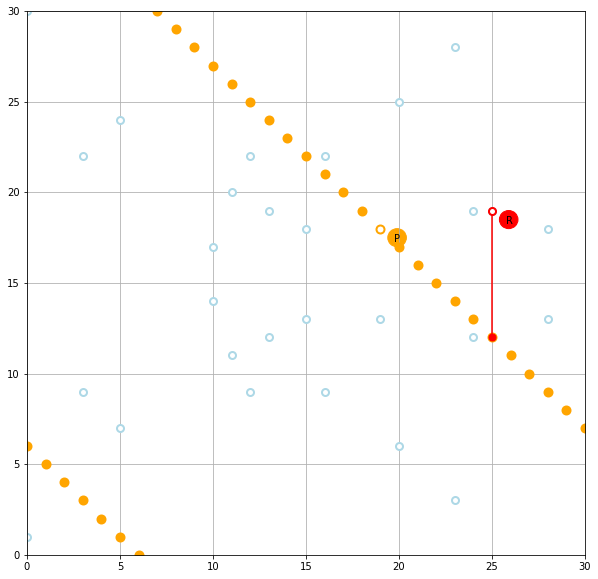

In [67]:
fig = plt.figure("Finite Space", (10, 10))
#
# FField
#
plt.plot(xs, ys, ".", markersize=14, markeredgewidth=2, color="lightblue", markerfacecolor="white")
#
# P and Q lines
#
plt.plot(xs_pq, ys_pq, ".", markersize=14, markeredgewidth=3, color="orange")
#
# P and Q points
#
plt.plot(
    (int(P.x), int(Q.x)),
    (int(P.y), int(Q.y)),
    ".",
    markersize=14,
    color="orange",
    markerfacecolor="white",
)
#
# R line
#
plt.plot(
    (int(R.x), int(R.x)),
    (int(R.y), int(-R.y)),
    ".-",
    markersize=14,
    color="red",
    markerfacecolor="red",
)
#
# R point
#
plt.plot(int(R.x), int(-R.y), ".", markersize=14, markeredgewidth=2, color="red", markerfacecolor="white")
#
# Labels
#
t_x = P.x.int() + 0.75
t_y = P.y.int() - 0.75

plt.text(t_x, t_y, "P")
ax = fig.axes[0]
ax.add_patch(
    pch.Circle(
        (t_x + 0.15, t_y + 0.25),
        radius=0.5,
        edgecolor="orange",
        facecolor="orange",
    )
)

if P != Q:
    t_x = Q.x.int() + 0.75
    t_y = Q.y.int() - 0.75

    plt.text(t_x, t_y, "Q")
    ax = fig.axes[0]
    ax.add_patch(
        pch.Circle(
            (t_x + 0.25, t_y + 0.25),
            radius=0.5,
            edgecolor="orange",
            facecolor="orange",
        )
    )

t_x = R.x.int() + 0.75
t_y = (-R.y).int() - 0.75

plt.text(t_x, t_y, "R")
ax = fig.axes[0]
ax.add_patch(
    pch.Circle(
        (t_x + 0.15, t_y + 0.25),
        radius=0.5,
        edgecolor="red",
        facecolor="red",
    )
)
#
#
#
# plt.xticks(np.arange(0, F.p, 10))
# plt.yticks(np.arange(0, F.p, 10))

plt.xlim(0, E.ff.p - 1)
plt.ylim(0, E.ff.p - 1)

plt.grid()
plt.show()
